In [1]:
import pandas as pd
import numpy as np
from plot_accuracy import plot_stepwise_accuracy, biomarker_rank
from LoadData import load_labeled_data

In [2]:
Multi_df = load_labeled_data(data_dir = './Data', label_list=['BRCA_LUMA','BRCA_LUMB', 'BRCA_HER2'], patient_type = './BRCApatient_type.csv')
Double_df = load_labeled_data(data_dir = './Data', label_list=['LUAD', 'LUSC'], patient_type = './BRCApatient_type.csv')

load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


In [3]:
# cancer data labeling
Multi_df = pd.get_dummies(Multi_df, columns=['Target'], drop_first=True)
Double_df = pd.get_dummies(Double_df, columns=['Target'], drop_first=True)

In [4]:
ranking_df = pd.read_csv('ranking_df.csv',index_col=0)
ranking_df.columns = ['RF','EXT']
ranking_df

,RF,EXT
?|100130426,2087,5128
?|100133144,2087,1946
?|100134869,2087,5128
?|10357,579,769
?|10431,2087,5128
...,...,...
ZYX|7791,2087,5128
ZZEF1|23140,2087,5128
ZZZ3|26009,2087,5128
psiTPTE22|387590,2087,4021


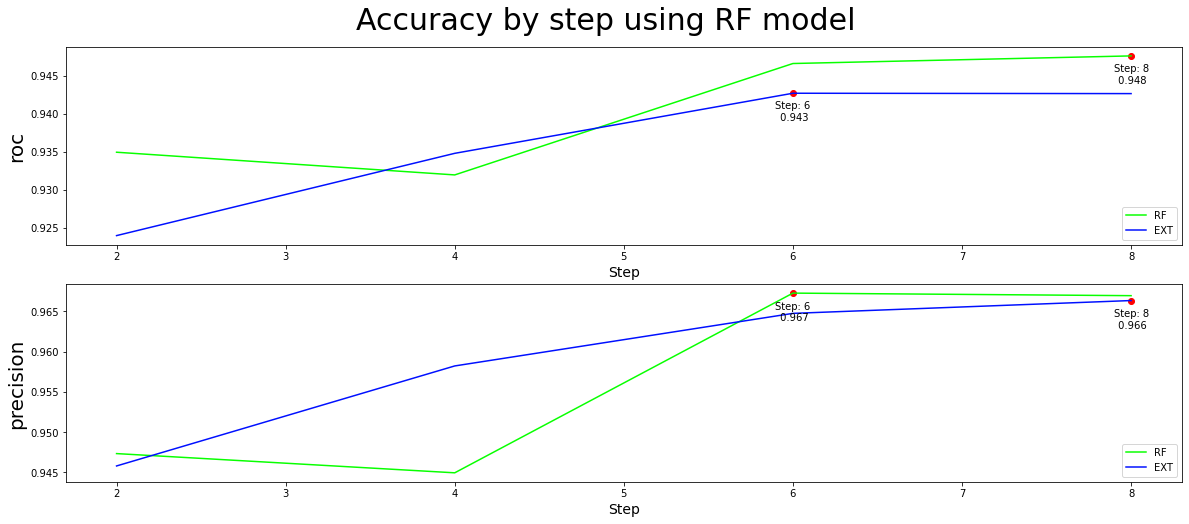

In [5]:
# double class 옵션 ['f1', 'accuracy', 'precision', 'recall', 'roc', 'aic', 'bic']
step_num = list(np.arange(2,10,2))
score_df = plot_stepwise_accuracy(Double_df, ranking_df[['RF','EXT']], step_num, model = ['RF', "recommended"], accuracy_metric=['roc', 'precision'])

In [6]:
score_df

,RF_roc,RF_precision,EXT_roc,EXT_precision
2,0.934929,0.947320,0.923977,0.945782
4,0.931949,0.944929,0.934784,0.958220
6,0.946582,0.967278,0.942677,0.964758
8,0.947581,0.966961,0.942629,0.966353


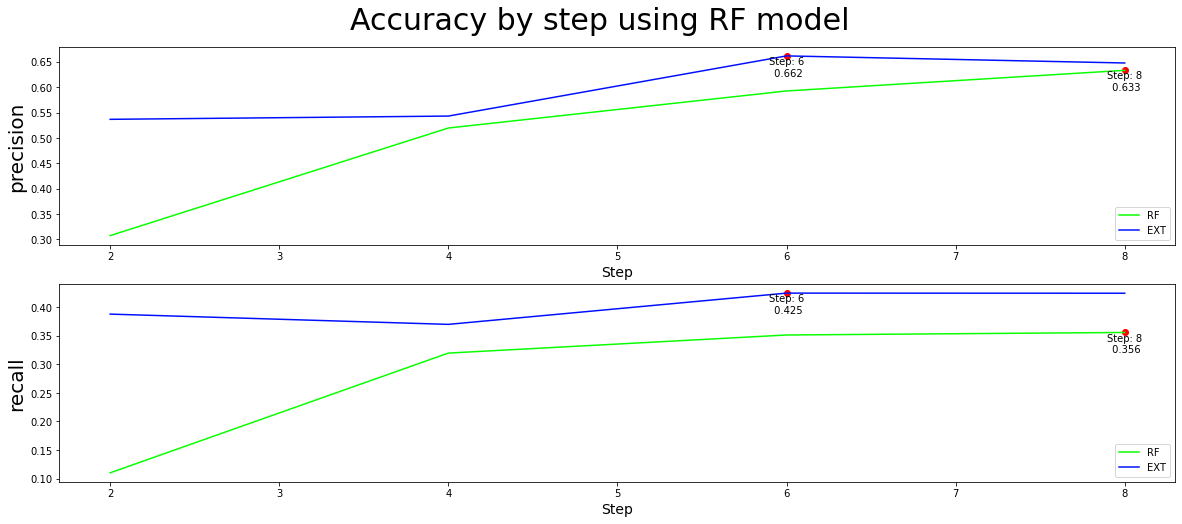

In [8]:
# multi class 옵션 ['f1', 'accuracy', 'precision', 'recall']
step_num = list(np.arange(2,10,2))
score_df = plot_stepwise_accuracy(Multi_df, ranking_df[['RF','EXT']], step_num, model = ['RF', "recommended"], accuracy_metric=['precision', 'recall'], multi_class=True)

In [9]:
score_df

,RF_precision,RF_recall,EXT_precision,EXT_recall
2,0.307464,0.110042,0.536661,0.388055
4,0.519543,0.319767,0.543085,0.370085
6,0.592561,0.351480,0.661681,0.424841
8,0.633206,0.355920,0.647728,0.424630
